In [ ]:
pip install transformers

In [ ]:
import os
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
sentence = "I love him.I hope to come true."
# ids = tokenizer.encode_plus(sentence)
# print(ids)
token = tokenizer.tokenize(sentence)
print(token)
ids = tokenizer.convert_tokens_to_ids(token)
print(ids)
ids_encode = tokenizer.encode(sentence)
print(ids_encode)
token_encode = tokenizer.convert_ids_to_tokens(ids_encode)
print(token_encode)
ids_encodeplus = tokenizer.encode_plus(sentence,add_special_tokens=True,
            return_token_type_ids=False,
            truncation=True,
            return_attention_mask=False,
            return_tensors='pt')
print(ids_encodeplus)
token_encode = tokenizer.convert_ids_to_tokens(ids_encodeplus)
print(token_encode)

['i', 'love', 'him', '.', 'i', 'hope', 'to', 'come', 'true', '.']
[1045, 2293, 2032, 1012, 1045, 3246, 2000, 2272, 2995, 1012]
[101, 1045, 2293, 2032, 1012, 1045, 3246, 2000, 2272, 2995, 1012, 102]
['[CLS]', 'i', 'love', 'him', '.', 'i', 'hope', 'to', 'come', 'true', '.', '[SEP]']
{'input_ids': tensor([[ 101, 1045, 2293, 2032, 1012, 1045, 3246, 2000, 2272, 2995, 1012,  102]])}


ValueError: invalid literal for int() with base 10: 'input_ids'

In [ ]:
sentence = "The movie makes me cry. I feel so touched with the complex relationship between Steven and May."
ids = tokenizer.encode_plus(sentence,add_special_tokens=True,
            max_length=300,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt')
print(ids)

{'input_ids': tensor([[ 101, 1996, 3185, 3084, 2033, 5390, 1012, 1045, 2514, 2061, 5028, 2007,
         1996, 3375, 3276, 2090, 7112, 1998, 2089, 1012,  102,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,

In [ ]:
def read_imdb_data(data_dir):
    data = []
    labels = []
    for label in ['pos', 'neg']:
        label_dir = os.path.join(data_dir, label)
        for file in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                review = f.read()
                # 移除HTML标签
                review = re.sub('<[^>]*>', '', review)
                data.append(review)
                labels.append(1 if label == 'pos' else 0)
    return data, labels

In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -zxvf aclImdb_v1.tar.gz

流式输出内容被截断，只能显示最后 5000 行内容。
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train

In [ ]:
train_data_dir = 'aclImdb/train'
test_data_dir = 'aclImdb/test'

train_reviews, train_labels = read_imdb_data(train_data_dir)
test_reviews, test_labels = read_imdb_data(test_data_dir)
from sklearn.model_selection import train_test_split
# 使用train_test_split函数将训练数据集拆分为训练数据集和验证数据集
test_reviews, val_reviews, test_labels, val_labels = train_test_split(test_reviews, test_labels, test_size=0.2, random_state=42)


In [ ]:
class IMDbDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_length):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.reviews[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long),
        }

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
class BERTBiLSTMClassifier(nn.Module):
    def __init__(self, bert_model, hidden_dim, num_classes):
        super(BERTBiLSTMClassifier, self).__init__()
        self.bert = bert_model
        self.bilstm = nn.LSTM(
            input_size=self.bert.config.hidden_size,
            hidden_size=hidden_dim,
            bidirectional=True,
            batch_first=True,
        )
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        out, _ = self.bilstm(bert_output.last_hidden_state)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

In [ ]:
HIDDEN_DIM = 250
NUM_CLASSES = 2
MAX_LENGTH = 300
BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 2e-5
EPS = 1e-8
DROPOUT = 0.2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:


train_dataset = IMDbDataset(train_reviews, train_labels, tokenizer, MAX_LENGTH)
val_dataset = IMDbDataset(val_reviews, val_labels, tokenizer, MAX_LENGTH)
test_dataset = IMDbDataset(test_reviews, test_labels, tokenizer, MAX_LENGTH)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
model = BERTBiLSTMClassifier(bert_model, HIDDEN_DIM, NUM_CLASSES)
model = model.to(device)

In [ ]:
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, eps = EPS)
loss_fn = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# 设置学习率调整策略
num_training_steps = len(train_dataloader) * EPOCHS
# num_warmup_steps = int(num_training_steps * 0.1)  # 设置预热步数为总训练步数的10%
num_warmup_steps = 0
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)

Epoch 1/3
----------
Epoch 1 Batch 10 Loss: 0.7016
Epoch 1 Batch 20 Loss: 0.6945
Epoch 1 Batch 30 Loss: 0.6679
Epoch 1 Batch 40 Loss: 0.6819
Epoch 1 Batch 50 Loss: 0.6541
Epoch 1 Batch 60 Loss: 0.5763
Epoch 1 Batch 70 Loss: 0.3885
Epoch 1 Batch 80 Loss: 0.4782
Epoch 1 Batch 90 Loss: 0.3304
Epoch 1 Batch 100 Loss: 0.3635
Epoch 1 Batch 110 Loss: 0.3610
Epoch 1 Batch 120 Loss: 0.3334
Epoch 1 Batch 130 Loss: 0.2714
Epoch 1 Batch 140 Loss: 0.2906
Epoch 1 Batch 150 Loss: 0.3574
Epoch 1 Batch 160 Loss: 0.2942
Epoch 1 Batch 170 Loss: 0.2625
Epoch 1 Batch 180 Loss: 0.3366
Epoch 1 Batch 190 Loss: 0.2734
Epoch 1 Batch 200 Loss: 0.2636
Epoch 1 Batch 210 Loss: 0.2595
Epoch 1 Batch 220 Loss: 0.2284
Epoch 1 Batch 230 Loss: 0.2426
Epoch 1 Batch 240 Loss: 0.3701
Epoch 1 Batch 250 Loss: 0.2674
Epoch 1 Batch 260 Loss: 0.3112
Epoch 1 Batch 270 Loss: 0.2479
Epoch 1 Batch 280 Loss: 0.2734
Epoch 1 Batch 290 Loss: 0.2674
Epoch 1 Batch 300 Loss: 0.3198
Epoch 1 Batch 310 Loss: 0.2278
Epoch 1 Batch 320 Loss: 0.2

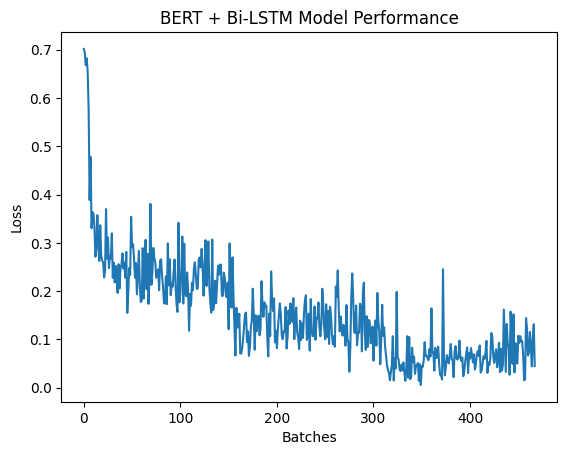

In [ ]:
import matplotlib.pyplot as plt
from typing import List
import random
import numpy as np


seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def train_model(model, train_dataloader, val_dataloader, optimizer, device, num_epochs=4, print_every=10):
    model.train()  # 将模型设置为训练模式
    model = model.to(device)  # 将模型移动到设备（GPU或CPU）

    criterion = nn.CrossEntropyLoss()  # 定义损失函数
    losses = []  # 用于存储每个batch的loss

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        running_loss = 0.0
        for batch_idx, batch in enumerate(train_dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()  # 重置梯度

            outputs = model(input_ids, attention_mask)  # 前向传播
            loss = criterion(outputs, labels)  # 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新参数

            running_loss += loss.item()

            # 打印每个batch的loss
            if (batch_idx + 1) % print_every == 0:
                avg_loss = running_loss / print_every
                print(f'Epoch {epoch + 1} Batch {batch_idx + 1} Loss: {avg_loss:.4f}')
                losses.append(avg_loss)
                running_loss = 0.0

        # 每个epoch结束时进行验证
        model.eval()
        val_running_loss = 0.0
        val_correct_predictions = 0
        with torch.no_grad():
            for batch in val_dataloader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['label'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, preds = torch.max(outputs, dim=1)
                val_correct_predictions += torch.sum(preds == labels).item()

        val_loss = val_running_loss / len(val_dataloader)
        val_accuracy = val_correct_predictions / len(val_dataloader.dataset)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

        model.train()

    print('Training complete.')

    # 绘制性能图
    plt.plot(losses)
    plt.xlabel('Batches')
    plt.ylabel('Loss')
    plt.title('BERT + Bi-LSTM Model Performance')
    plt.show()

# 调用训练函数
train_model(model, train_dataloader, val_dataloader, optimizer, device, num_epochs=EPOCHS)


In [ ]:
def eval_model(model, data_loader, device, apply_softmax=False) -> List[List[int]]:
    model.eval()
    true_labels = []
    predictions = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            if apply_softmax:
                outputs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, dim=1)

            true_labels.extend(labels.cpu().numpy().tolist())
            predictions.extend(preds.cpu().numpy().tolist())

    return true_labels, predictions


from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

true_labels, predictions = eval_model(model, test_dataloader, device, apply_softmax=True)

print("Accuracy:", accuracy_score(true_labels, predictions))
print("Recall:", recall_score(true_labels, predictions, average='weighted'))
print("Precision:", precision_score(true_labels, predictions, average='weighted'))
print("F1 Score:", f1_score(true_labels, predictions, average='weighted'))
print("\nClassification Report:\n", classification_report(true_labels, predictions))

Accuracy: 0.91095
Recall: 0.91095
Precision: 0.9163074176418863
F1 Score: 0.9106709369836818

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.91     10015
           1       0.87      0.97      0.92      9985

    accuracy                           0.91     20000
   macro avg       0.92      0.91      0.91     20000
weighted avg       0.92      0.91      0.91     20000



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 保存模型
torch.save(model.state_dict(), '/content/gdrive/My Drive/BERT-BiLSTM_sentiment_analysis.pt')


Mounted at /content/gdrive
